## 1. Load and inspect the dataset structure.

In [109]:
import pandas as pd

df = pd.read_excel(r"C:\Users\Juan Esteban\Downloads\Online Retail.xlsx")
df.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [124]:
print(df.shape)


(541909, 8)


## 2. Perform data quality assessment:

In [111]:
#handle missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [112]:
#delete rows with missing CustomerID
df1 = df.dropna(subset=['CustomerID'])

In [113]:
#Identify and address duplicate records
duplicated_rows = df1[df1.duplicated()]


#delete duplicated rows
df2 = df1.drop_duplicates().copy()
print(df2.shape)

(401604, 8)


In [114]:
# identify cancelled transactions
df_cancelled_transactions = df2[df2['InvoiceNo'].str.contains('C', na=False)]

print(df_cancelled_transactions.shape)
print(df_cancelled_transactions.head())

(8872, 8)
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  


In [115]:
negative_quantity = df2[df2['Quantity'] < 0].copy()
print(negative_quantity.shape)
print(negative_quantity.head())

(8872, 8)
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  


In [116]:
# Number of negative quantity transactions that are not cancelled
negative_not_cancelled = df2[
    (df2['Quantity'] < 0) & 
    (~df2['InvoiceNo'].str.startswith('C', na=False))
]
print(negative_not_cancelled.shape)

(0, 8)


In [117]:
#Same invoice both positive and negative quantities
invoice_signs = (
    df2.groupby('InvoiceNo')['Quantity']
    .apply(lambda x: (x > 0).any() and (x < 0).any())
)

partial_returns = invoice_signs[invoice_signs].index

df2[df2['InvoiceNo'].isin(partial_returns)].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [118]:
#reverse previous transactions, same products bought and returned by same customers
negatives = negative_not_cancelled[['CustomerID', 'StockCode', 'Quantity', 'InvoiceDate']]

positives = df2[df2['Quantity'] > 0][['CustomerID', 'StockCode', 'Quantity', 'InvoiceDate']]

merged = negatives.merge(
    positives,
    on=['CustomerID', 'StockCode'],
    suffixes=('_neg', '_pos')
)

merged = merged[merged['InvoiceDate_pos'] < merged['InvoiceDate_neg']]
merged.head()



,CustomerID,StockCode,Quantity_neg,InvoiceDate_neg,Quantity_pos,InvoiceDate_pos


In [ ]:
# Handle negative quantities and prices multiplying them to get TotalPrice
df2['TotalPrice'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3.Generate descriptive statistics:

In [125]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,430.352218


In [127]:
#Unique customers, unique transactions, unique products
unique_customers = df2['CustomerID'].nunique()
unique_transactions=df2['InvoiceNo'].nunique()
unique_products=df2['StockCode'].nunique()

print(f"Unique customers: {unique_customers} customers")
print(f"Unique transactions: {unique_transactions} Invoices")    
print(f"Unique products: {unique_products} StockCodes")

Unique customers: 4372 customers
Unique transactions: 22190 Invoices
Unique products: 3684 StockCodes


Text(0.5, 1.0, 'Monthly Revenue Distribution')

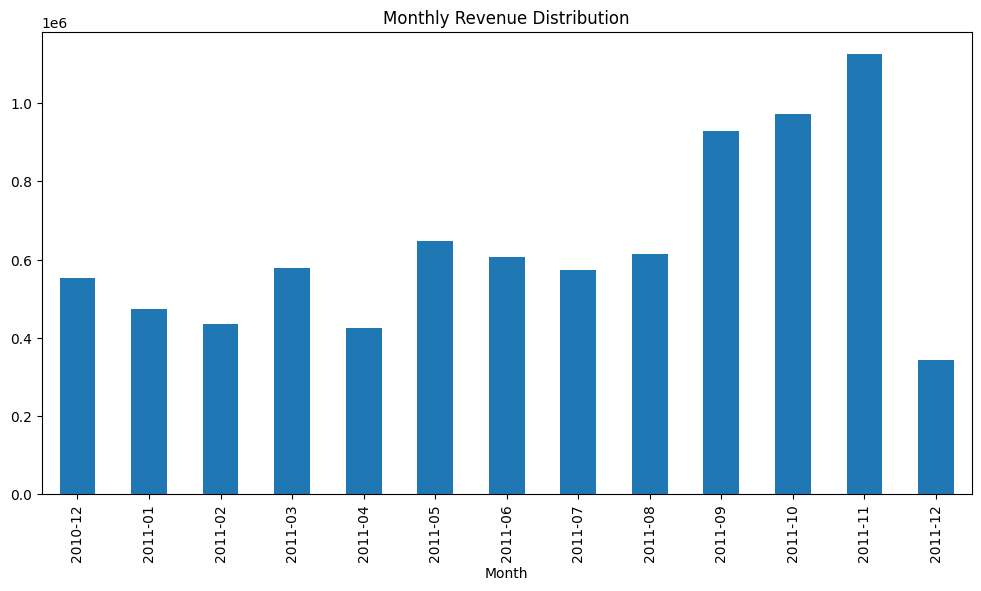

In [ ]:
#revenue distribution by month
import matplotlib.pyplot as plt 
# distribution of revenue by month
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['Month'] = df2['InvoiceDate'].dt.to_period('M')
monthly_revenue = df2.groupby('Month')['TotalPrice'].sum()
monthly_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Revenue Distribution')

<Axes: xlabel='Country', ylabel='Total Price'>

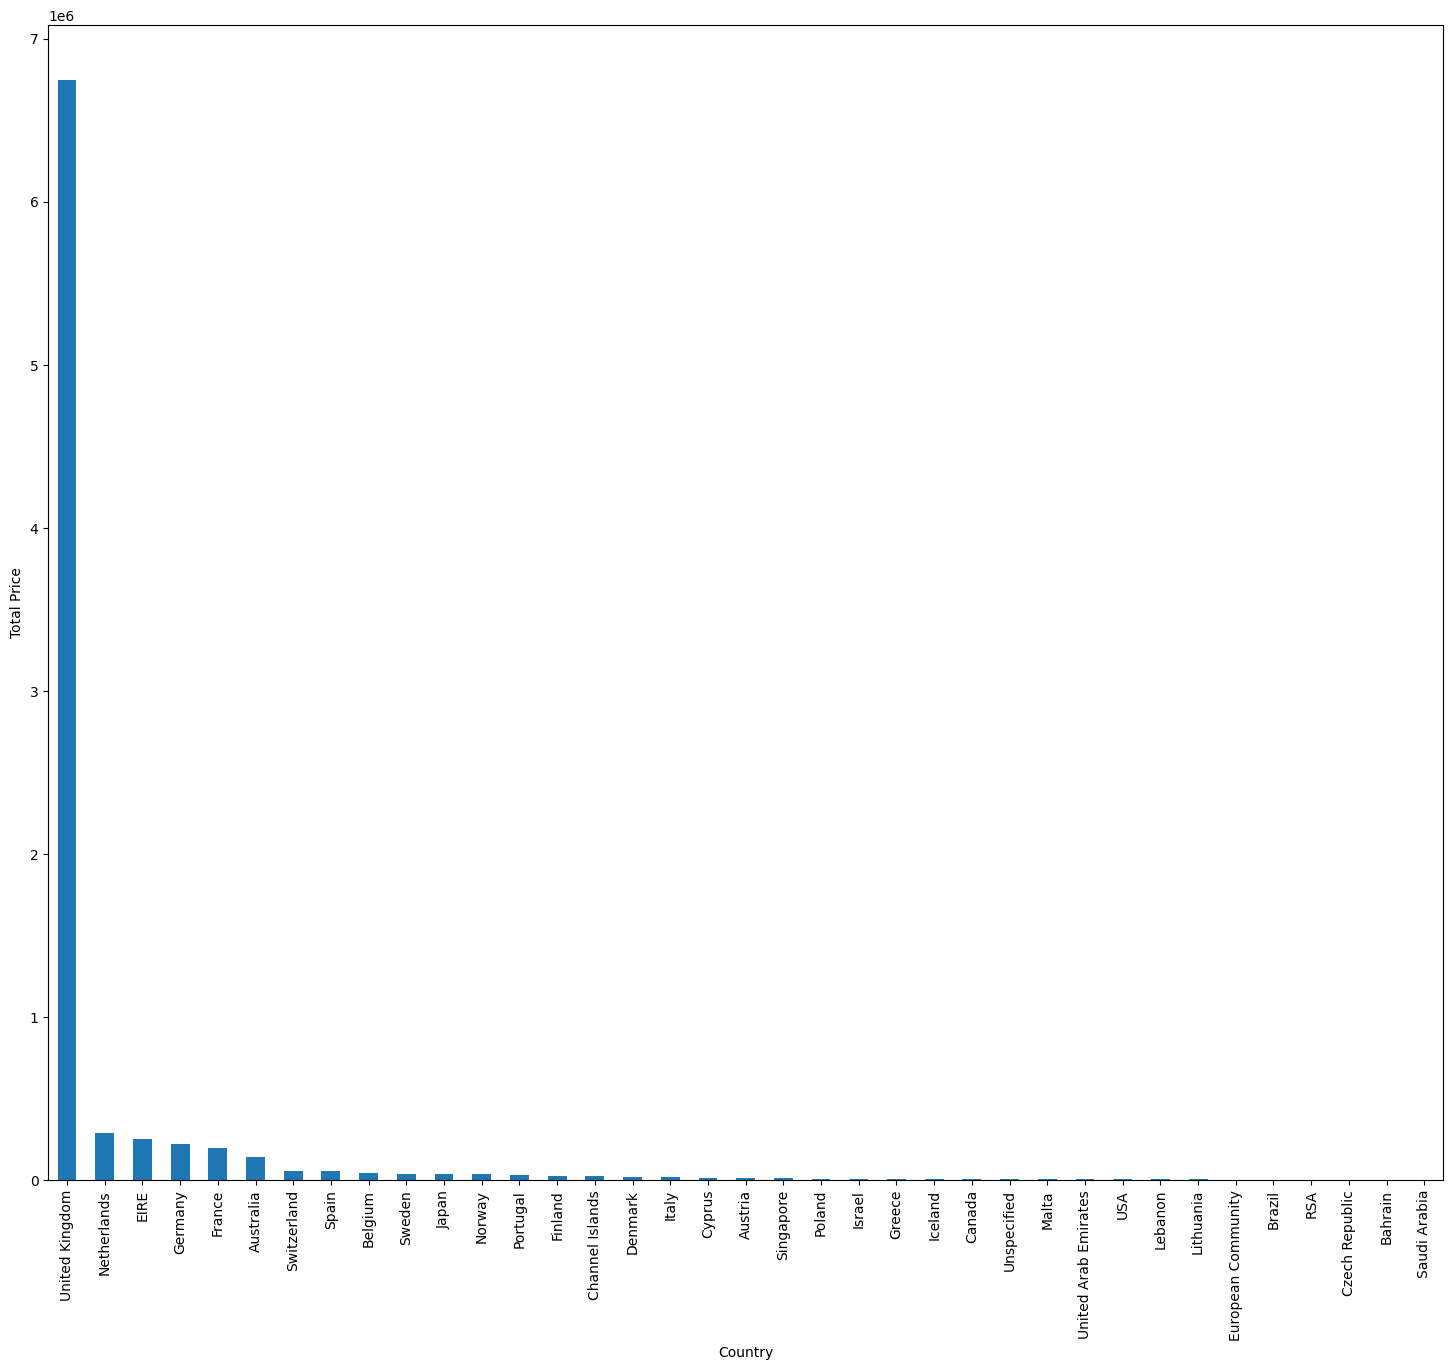

In [139]:
#Revenue distribution by country
country_revenue = df2.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.ylabel("Total Price")
country_revenue.plot(kind='bar', figsize=(18, 15))


Text(0, 0.5, 'Frequency')

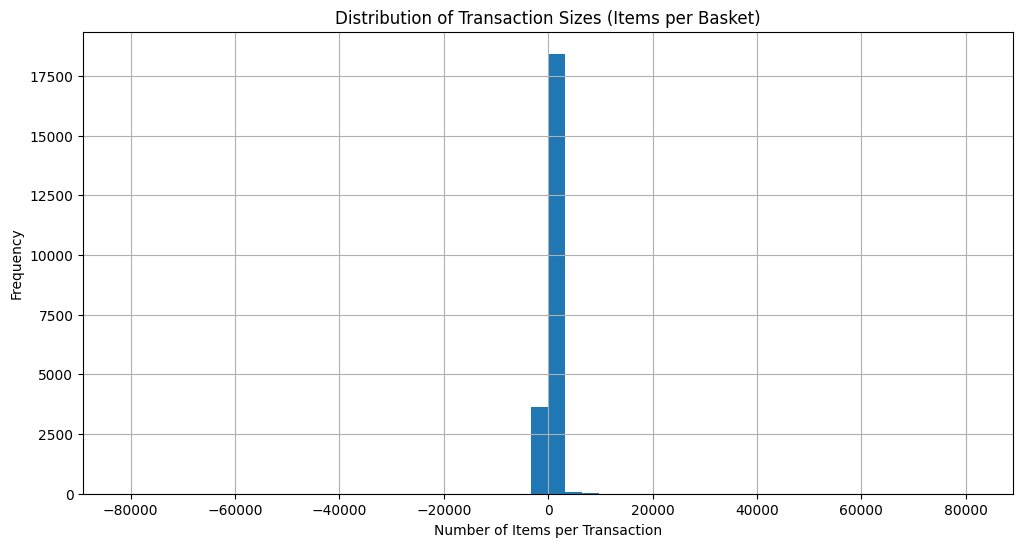

In [ ]:
# Distribution of transaction sizes (items per basket)